# Layerwise Sensitivity

See how much different layers are sensitive to (1) pairs with dobj/iobj change, and (2) random sentence pairs.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.spatial.distance import cosine
import seaborn as sns

import src.sent_encoder
import src.sentpair_generator

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load sentence pairs

In [2]:
with open('../data/sents.pkl', 'rb') as f:
  data = pickle.load(f)
  data = list(data)

In [3]:
# https://wortschatz.uni-leipzig.de/en/download/english
# Wikipedia, 2016, 10K sentences
sentgen = src.sentpair_generator.SentPairGenerator()
wiki_sents = sentgen.get_wikipedia()

In [4]:
len(data)

321

In [5]:
enc = src.sent_encoder.SentEncoder()

## Generate boxplots

In [6]:
def plot_distances(sents, task_name):
  distances = enc.get_layer_distance_df(sents)
  sns.lineplot(x='layer', y='dist', data=distances, err_style='bars', ci=95)
  plt.title(f"Sentence embedding distance for pairs: {task_name}.")
  plt.ylim(0)
  plt.show()

/h/bai/moar/bai-conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


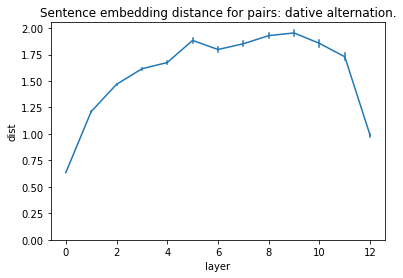

In [7]:
plot_distances(data, 'dative alternation')

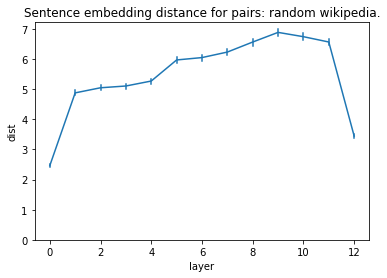

In [8]:
wiki_sents = sentgen.get_wikipedia()
plot_distances(wiki_sents, 'random wikipedia')

## Combined plot

## Other sentence types

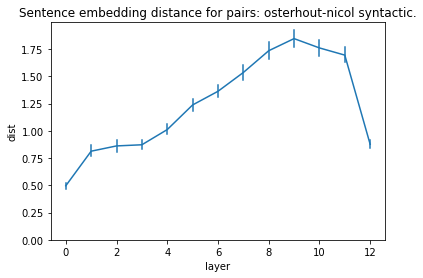

In [9]:
sents = sentgen.get_osterhout_nicol('syntactic')
plot_distances(sents, 'osterhout-nicol syntactic')

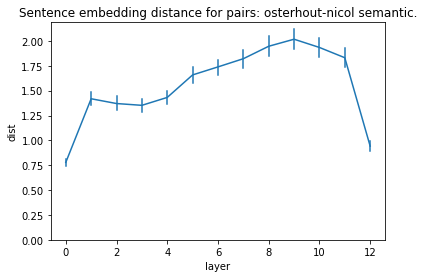

In [10]:
sents = sentgen.get_osterhout_nicol('semantic')
plot_distances(sents, 'osterhout-nicol semantic')